# Metadata

```
Author: Linnaea Kavulich
Contact: qpk4kp@virginia.edu
Course: DS 5001 (Spring 2023)
```

<h1><center>The State of Natural Language Processing</center></h1>
<h3><center>An exploration of the infamous Locke-Hobbes-Rousseau Debate Using NLP techniques</center></h3>

*** 

<center>This notebook imports tables in F4 format to get word embeddings.</center>

| Book_id | Title | Author |
| :- | :- | :- |
| 1 | The Social Contract | Jean-Jacques Rousseau 
| 2 | Leviathan | Thomas Hobbes
| 3 | Second Treatise of Government | John Locke
| 4 | Discourse on the Origin and Basis of Inequality Among Men | Jean-Jacques Rousseau
| 5 | An Essay Concerning Humane Understanding, Vol. 1 | John Locke
| 6 | An Essay Concerning Humane Understanding, Vol. 2 | John Locke

## Import Packages

In [1]:
import numpy as np
import pandas as pd

import os
os.chdir('C:/Users/linna/Box/MSDS/DS5001/Final Project/Corpus/')

from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [2]:
OHCO = ['book_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
PARA = OHCO[:4]
SENT = OHCO[:5] 
BAG = PARA

***

## Load CORPUS, convert to DOCS

In [3]:
VOCAB = pd.read_csv('VOCAB_dfidf.csv')

In [4]:
VOCAB = VOCAB.set_index('term_str')

In [5]:
VOCAB

,n,p,i,n_chars,h,max_pos,cat_pos,stop,stem_porter,stem_snowball,stem_lancaster,dfidf
term_str,,,,,,,,,,,,
the,41075,0.059972,4.059561,3,0.243461,DT,{'DT'},1,the,the,the,0.000000
of,31825,0.046467,4.427661,2,0.205739,IN,{'IN'},1,of,of,of,0.000000
and,22465,0.032800,4.930142,3,0.161711,CC,{'CC'},1,and,and,and,0.000000
to,22072,0.032227,4.955604,2,0.159702,TO,{'TO'},1,to,to,to,0.000000
that,13160,0.019214,5.701662,4,0.109554,IN,"{'RB', 'VBN', 'VB', 'DT', 'IN', 'WDT'}",1,that,that,that,1.438746
...,...,...,...,...,...,...,...,...,...,...,...,...
ammunition,1,0.000001,19.385534,10,0.000028,NN,{'NN'},0,ammunit,ammunit,ammunit,7.515700
spoiles,1,0.000001,19.385534,7,0.000028,NNS,{'NNS'},0,spoil,spoil,spoil,7.515700
serene,1,0.000001,19.385534,6,0.000028,JJ,{'JJ'},0,seren,seren,ser,7.515700


In [6]:
CORPUS = pd.read_csv('CORPUS.csv')

In [7]:
CORPUS.head()

,book_id,chap_num,para_num,sent_num,token_num,token_str,term_str,pos
0,1,1,0,0,0,SUBJECT,subject,NN
1,1,1,0,0,1,OF,of,IN
2,1,1,0,0,2,THE,the,DT
3,1,1,0,0,3,FIRST,first,JJ
4,1,1,0,0,4,BOOK,book,NN


In [8]:
CORPUS['term_str'] = CORPUS['term_str'].astype(str)

In [9]:
CORPUS.dtypes

book_id       int64
chap_num      int64
para_num      int64
sent_num      int64
token_num     int64
token_str    object
term_str     object
pos          object
dtype: object

In [10]:
# DOCS = CORPUS.groupby(PARA)\
#     .term_str.apply(lambda  x:  x.tolist())\
#     .reset_index()['term_str'].tolist()

In [11]:
DOCS = CORPUS[~CORPUS.pos.str.match('NNPS?')].groupby(PARA)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()

In [12]:
DOCS = [doc for doc in DOCS if len(doc) > 1] # Lose single word docs

In [13]:
#DOCS

In [38]:
# word2vec parameters
w2v_params = dict(
    window = 10,
    min_count = 50,
    workers = 4
)

In [39]:
model = word2vec.Word2Vec(DOCS, **w2v_params)

In [40]:
coords = pd.DataFrame(
    dict(
        vector = [model.wv.get_vector(w) for w in model.wv.key_to_index.keys()], 
        term_str = model.wv.key_to_index.keys()
    )).set_index('term_str')

In [41]:
coords

,vector
term_str,
the,"[-0.323186, 0.15640874, -0.23146872, -0.129506..."
of,"[-0.12292744, 0.1918053, 0.71229273, 0.4232382..."
and,"[-0.11503367, 0.011079934, -0.040637013, -0.26..."
to,"[-0.31074533, 0.24946204, -0.14895745, -0.2250..."
that,"[-0.663405, 0.39052185, -0.59912825, -0.744123..."
...,...
appearances,"[-0.17933567, 0.22113249, 0.065557346, -0.2928..."
employ,"[-0.06264408, 0.17024055, 0.042281635, -0.1029..."
namely,"[-0.32884702, 0.24147247, 0.07667059, 0.107812..."


In [42]:
tsne_engine = TSNE(learning_rate=200, perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_model = tsne_engine.fit_transform(coords.vector.to_list())

C:\Users\linna\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [43]:
coords['x'] = tsne_model[:,0]
coords['y'] = tsne_model[:,1]

In [44]:
if coords.shape[1] == 3:
    coords = coords.merge(VOCAB.reset_index(), on='term_str')
    coords = coords.set_index('term_str')

In [45]:
coords = coords[coords.stop == 0]

In [46]:
px.scatter(coords.reset_index(), 'x', 'y', 
           text='term_str', 
           color='max_pos', 
           hover_name='term_str',          
           size='dfidf',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

In [47]:
def complete_analogy(A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(model.wv.most_similar(positive=[B, C], negative=[A])[0:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None
    
def get_most_similar(positive, negative=None):
    return pd.DataFrame(model.wv.most_similar(positive, negative), columns=['term', 'sim'])

In [24]:
complete_analogy('man', 'nature', 'law', 3)

,term,sim
0,civill,0.649357
1,divine,0.646404
2,lawes,0.619651


In [25]:
get_most_similar('nature')

,term,sim
0,war,0.655836
1,civil,0.626860
2,civill,0.603682
3,society,0.592263
4,punishment,0.591808
5,rule,0.564721
6,divine,0.559942
7,means,0.544761
8,execution,0.542379
9,institution,0.541944


In [26]:
get_most_similar('man')

,term,sim
0,child,0.712449
1,soul,0.698684
2,monarch,0.674936
3,mans,0.673660
4,he,0.673196
5,creature,0.666609
6,citizen,0.642544
7,prince,0.638295
8,person,0.629240
9,right,0.610754


In [27]:
def hca(sims, labels, linkage_method='ward', color_thresh=.3):
    tree = sch.linkage(sims, method=linkage_method)
    fig_height = len(labels) / 3
    plt.figure()
    fig, axes = plt.subplots(figsize=(12, fig_height))
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

def plot_terms_tree(coords, terms_n = 100, term_pos_pat = r'^(N|V)', color_thresh=1):
    term_filter = coords.max_pos.str.match(term_pos_pat) & (coords.stop == 0) & (coords.index.str.len() > 2)
    M = coords[term_filter].sort_values('dfidf', ascending=False).vector.head(terms_n)
    IDX = coords.loc[M.index].index #term_str
    hca(M.to_list(), IDX.to_list(), color_thresh=color_thresh)

<Figure size 432x288 with 0 Axes>

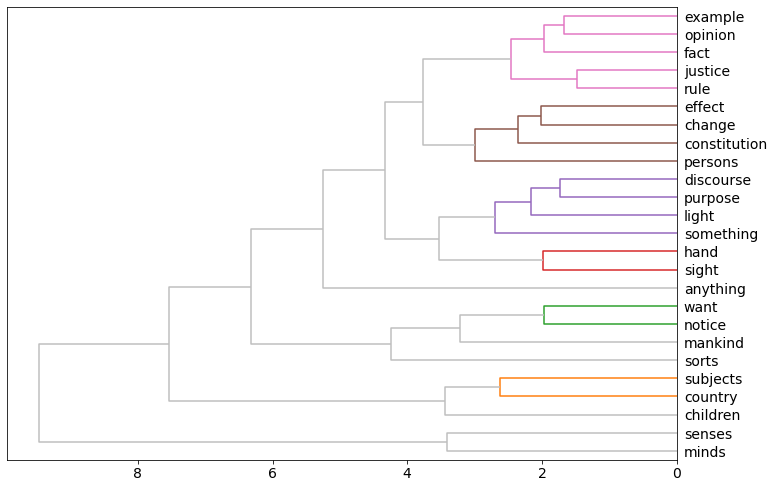

In [50]:
plot_terms_tree(coords, term_pos_pat=r'^NN[^P]?', color_thresh=3, terms_n=25)

<Figure size 432x288 with 0 Axes>

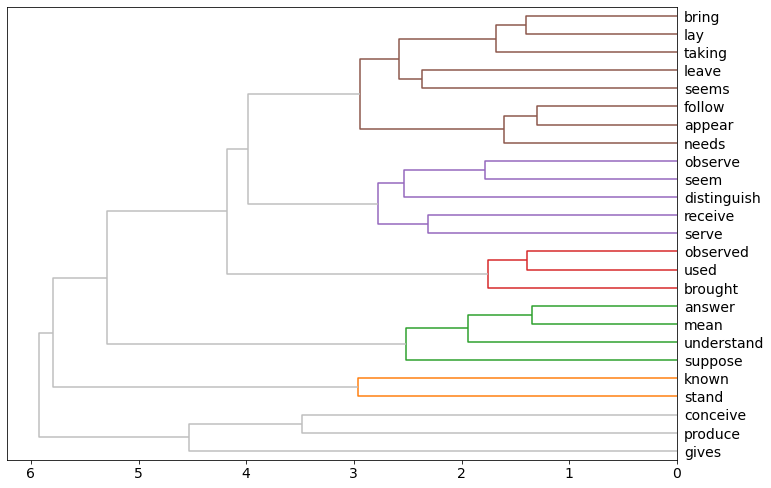

In [51]:
plot_terms_tree(coords, term_pos_pat=r'^V', color_thresh=3, terms_n=25)

## Save tables

In [30]:
os.chdir('C:/Users/linna/Box/MSDS/DS5001/Final Project/Corpus/')

In [31]:
all_normed_vectors = model.wv.get_normed_vectors()
idx = model.wv.key_to_index
W2V = pd.DataFrame(all_normed_vectors, index=idx)

In [32]:
W2V.index.rename('term_str', inplace=True)

In [33]:
W2V

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
term_str,,,,,,,,,,,,,,,,,,,,,
the,-0.126247,-0.084266,0.027007,0.071747,-0.181691,0.011848,-0.090525,0.083096,-0.065212,0.011591,...,-0.147421,-0.111085,-0.104109,0.091327,-0.047024,-0.020279,-0.142271,-0.112980,0.085293,0.006726
of,0.039126,0.017462,0.040782,0.016315,0.073705,-0.068861,-0.006519,-0.023517,-0.045814,-0.112081,...,0.014242,-0.000023,-0.065027,-0.115207,-0.107903,0.130527,-0.008878,-0.022137,0.021257,0.020276
and,-0.058647,0.042488,-0.035851,-0.028748,0.210164,-0.143001,-0.169204,0.160208,0.032022,-0.066108,...,-0.111858,-0.007703,-0.021652,0.021903,0.060744,0.062308,-0.016874,-0.071404,0.206137,-0.109651
to,-0.108300,0.009443,-0.047363,0.060192,0.139230,-0.053709,-0.083625,0.150003,0.190099,-0.142584,...,-0.007701,0.001792,-0.102656,0.003445,0.084196,-0.010491,0.067589,-0.032555,-0.185256,-0.047077
that,-0.190457,0.009249,-0.106320,-0.101679,0.065795,0.061945,-0.063874,0.038054,0.041062,-0.049623,...,-0.062105,-0.149239,-0.079895,0.128415,0.032568,-0.070493,0.081156,-0.083523,-0.171575,0.017188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
appearances,-0.128754,0.149417,0.004551,-0.132184,0.112354,-0.091795,-0.081053,0.253100,-0.139764,-0.105329,...,0.137025,-0.027527,-0.067985,-0.080761,0.187047,0.147767,0.120402,-0.186623,-0.040800,-0.054076
employ,-0.069434,0.080611,-0.015695,-0.017558,0.125006,-0.211053,-0.181034,0.312924,-0.047961,-0.025020,...,0.073822,0.023340,-0.187167,-0.106319,0.138729,0.104316,0.009108,-0.046396,-0.009047,0.053370
namely,-0.127350,-0.007425,-0.004049,0.047843,0.092899,-0.022260,-0.143221,0.150462,-0.048110,-0.079203,...,0.010533,-0.069511,-0.060370,0.058280,0.124870,0.118723,0.058949,-0.103375,-0.099605,-0.005247


In [34]:
W2V.to_csv('W2V.csv')